# SETUP

## These are the libraries required for training a scikit learning model to differentiate an image of a cat or dog. 
1. os is used for basic file handling/editing.
2. pickle is used for handling data stream into the scikit learn model, and is then used to save the model into a exportable file.
3. Many functions/libraries from skimage were imported to read and resize images to prepare the dataset for training the model.
4. sklearn library was the main library used to import the training model to be used.
5. numpy, pandas, and matplotlib libraries were used to evaluate the models' performance and plot them on a readable graph.

In [36]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PREPARE DATA

In this section the raw images and cleaned and sorted into an array alongside their labels. This is part of data cleaning/preprocessing.

In [2]:
input_dir = './data/'
categories = ['cats', 'dogs']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

# train / test split

In this section the data prepared above is split using a function from the sklearn library to split them accordingly to training and testing data. 80% - 20% split respectively.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# train classifier

In this section the model is trained and its parameters are fine tuned to best suit the situation.

In [10]:
classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

# test performance

In this section the model trained above is used on the test dataset to evaluate its performance.

In [31]:
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))

pickle.dump(best_estimator, open('./model.p', 'wb'))

loss = log_loss(y_test, y_prediction)
print (loss)

70.0% of samples were correctly classified
10.813096016735146


# EVALUATE MODEL Pt.1

In this section the model's performance is then evaluated based on different sized datasets, their results are then saved into their respective folders.

In [22]:
def get_score(dir):
    data = []
    labels = []
    for category_idx, category in enumerate(categories):
        for file in os.listdir(os.path.join(dir, category)):
            img_path = os.path.join(dir, category, file)
            img = imread(img_path)
            img = resize(img, (15, 15))
            data.append(img.flatten())
            labels.append(category_idx)

    data = np.asarray(data)
    labels = np.asarray(labels)

    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

    classifier = SVC()

    parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

    grid_search = GridSearchCV(classifier, parameters)

    grid_search.fit(x_train, y_train)

    best_estimator = grid_search.best_estimator_

    y_prediction = best_estimator.predict(x_test)

    score = accuracy_score(y_prediction, y_test)

    score*=100

    return score

In [32]:
def get_loss(dir):
    data = []
    labels = []
    for category_idx, category in enumerate(categories):
        for file in os.listdir(os.path.join(dir, category)):
            img_path = os.path.join(dir, category, file)
            img = imread(img_path)
            img = resize(img, (15, 15))
            data.append(img.flatten())
            labels.append(category_idx)

    data = np.asarray(data)
    labels = np.asarray(labels)

    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

    classifier = SVC()

    parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

    grid_search = GridSearchCV(classifier, parameters)

    grid_search.fit(x_train, y_train)

    best_estimator = grid_search.best_estimator_

    y_prediction = best_estimator.predict(x_test)

    loss = log_loss(y_test, y_prediction)

    return loss

# EVALUATE MODEL Pt.2

In this section, all the results obtained from part 1 is then saved into an array, and then plotted on a readable graph.

In [34]:
accuracy_scores = []
losses = []
sample_size = [10, 100, 250, 500, 1000]

accuracy_scores.append(get_score('./data(10)/'))
accuracy_scores.append(get_score('./data(100)/'))
accuracy_scores.append(get_score('./data(250)/'))
accuracy_scores.append(get_score('./data(500)/'))
accuracy_scores.append(get_score('./data(1000)/'))

losses.append(get_loss('./data(10)/'))
losses.append(get_loss('./data(100)/'))
losses.append(get_loss('./data(250)/'))
losses.append(get_loss('./data(500)/'))
losses.append(get_loss('./data(1000)/'))

print(accuracy_scores)
print(losses)

[25.0, 47.5, 56.99999999999999, 58.5, 63.74999999999999]
[36.04365338911715, 18.021826694558577, 12.615278686191004, 13.876806554810102, 13.606479154391723]


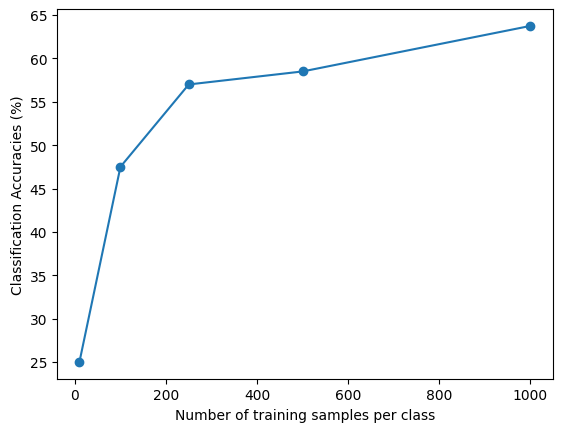

In [41]:
information = {'Number of image per class': sample_size, 'Training Accuracy': accuracy_scores, 'Training Loss': losses}
df = pd.DataFrame(information)
df

plt.plot(sample_size, accuracy_scores, '-o')
plt.xlabel('Number of training samples per class')
plt.ylabel('Classification Accuracies (%)')
plt.show()

TEST ON NEW DATA

In [ ]:
unsorted_path = './data/unsorted/'
unsorted = os.listdir(unsorted_path)
unsorted_images = []
for images in unsorted:
    image = imread(os.path.join(unsorted_path, images))
    image = resize(image, (15, 15))
    image = image.flatten()
    unsorted_images.append(image)

grid_search.predict(unsorted_images)


array([0, 0, 1, 1, 1, 0, 0])